In [2]:
import pandas as pd
import numpy as np
from pandasql import sqldf

In [92]:
csvc = pd.read_pickle("customer_service_reps")
engagement = pd.read_pickle("engagement")
subs = pd.read_csv("subs.csv")
adspend = pd.read_excel("adspend.xlsx")

In [6]:
q1 = '''select *
from subs
inner join csvc
on csvc.subid = subs.subid'''

subs_csvc = sqldf(q1)
subs_csvc

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,0,25.0,1,...,2019-12-08 15:05:25.000000,2019-12-07 16:37:06.000000,14,0,OTT,0.0000,0,2019-12-07 17:34:29.000000,None,0.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,0,61.0,0,...,None,2020-02-19 18:30:15.000000,14,1,OTT,4.5875,0,2020-02-19 19:45:46.000000,2020-03-05 13:52:53.000000,1.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,0,61.0,0,...,None,2020-02-19 18:30:15.000000,14,1,OTT,4.5875,1,2020-03-05 13:52:53.000000,None,0.0
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,0,23.0,0,...,None,2020-03-05 14:52:22.000000,14,1,OTT,3.4498,0,2020-03-05 14:52:22.000000,2020-03-20 13:54:48.000000,1.0
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,0,23.0,0,...,None,2020-03-05 14:52:22.000000,14,1,OTT,3.4498,1,2020-03-20 13:54:48.000000,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209889,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,0,61.0,0,...,2020-03-06 04:07:06.000000,2020-03-06 02:57:03.000000,14,0,OTT,0.0000,0,2020-03-06 06:37:50.000000,None,0.0
209890,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,0,43.0,0,...,2020-01-12 13:42:46.000000,2020-01-01 22:43:56.000000,14,0,OTT,0.0000,0,2020-01-01 22:43:56.000000,None,0.0
209891,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,0,38.0,0,...,2019-11-25 22:25:46.000000,2019-11-17 14:12:33.000000,14,0,OTT,0.0000,0,2019-11-17 15:05:20.000000,None,0.0
209892,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,1,49.0,0,...,None,2019-12-06 18:02:13.000000,14,1,OTT,4.5875,0,2019-12-06 19:05:16.000000,2019-12-21 10:05:18.000000,1.0


In [7]:
subs_csvc = subs_csvc.loc[:,~subs_csvc.columns.duplicated()]

In [8]:
subs_csvc.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,0,25.0,1,...,0,2019-12-08 15:05:25.000000,14,0,OTT,0.0000,0,2019-12-07 17:34:29.000000,None,0.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,0,61.0,0,...,1,None,14,1,OTT,4.5875,0,2020-02-19 19:45:46.000000,2020-03-05 13:52:53.000000,1.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,0,61.0,0,...,1,None,14,1,OTT,4.5875,1,2020-03-05 13:52:53.000000,None,0.0
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,0,23.0,0,...,1,None,14,1,OTT,3.4498,0,2020-03-05 14:52:22.000000,2020-03-20 13:54:48.000000,1.0
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,0,23.0,0,...,1,None,14,1,OTT,3.4498,1,2020-03-20 13:54:48.000000,None,0.0


In [15]:
subs_csvc = subs_csvc.sort_values(['subid','payment_period'])

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
subs_csvc.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,customer_service_rep_id,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
65667,20000062,None,4.025656,None,expand regional access,27.301448,2.342891,0,59.0,0,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 22:44:55,4.0,2019-07-15 00:00:00,0,0.0000,0.0367,ar,0,0,None,1,32881490,0,2019-07-04 17:44:28.000000,14,0,OTT,0.0000,0,2019-06-30 23:05:47.000000,None,0.0
4792,20000405,enhanced,3.952012,comedy,access to exclusive content,33.101274,2.375602,0,48.0,0,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-08 11:25:48,10.0,2020-03-23 00:00:00,0,0.0000,0.6606,ar,0,0,None,1,32055139,0,2020-03-18 00:48:31.000000,14,0,OTT,0.0000,0,2020-03-08 14:14:06.000000,None,0.0
73022,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,0,NaN,0,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-09 13:26:49,NaN,2020-02-24 00:00:00,0,NaN,NaN,ar,1,0,Paypal,0,34802377,1,None,14,1,OTT,4.5875,0,2020-02-09 14:05:27.000000,2020-02-24 11:05:23.000000,1.0
73023,20000604,economy,NaN,comedy,replace OTT,NaN,NaN,0,NaN,0,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-09 13:26:49,NaN,2020-02-24 00:00:00,0,NaN,NaN,ar,1,0,Paypal,0,34802377,1,None,14,1,OTT,4.5875,1,2020-02-24 11:05:23.000000,None,0.0
94001,20000685,base,2.817946,comedy,other,25.851492,1.873939,1,67.0,0,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,2020-03-18 00:00:00,0,3.6700,0.3303,ar,1,0,Standard Charter,0,35600079,1,None,14,1,OTT,3.6700,0,2020-03-03 07:43:33.000000,2020-03-18 14:33:41.000000,1.0
94002,20000685,base,2.817946,comedy,other,25.851492,1.873939,1,67.0,0,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,2020-03-18 00:00:00,0,3.6700,0.3303,ar,1,0,Standard Charter,0,35600079,1,None,14,1,OTT,3.6700,1,2020-03-18 14:33:41.000000,None,0.0
187169,20000741,base,NaN,comedy,access to exclusive content,25.851492,NaN,0,75.0,0,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-25 20:12:32,1.0,2019-09-09 00:00:00,0,0.0000,0.0367,ar,0,0,None,1,34671162,0,2019-08-26 07:04:17.000000,14,0,OTT,0.0000,0,2019-08-25 23:38:14.000000,None,0.0
99666,20000796,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,0,34.0,0,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,2019-10-11 00:00:00,0,4.5875,0.0367,ar,1,0,RAKBANK,0,34899988,0,None,14,1,OTT,4.5875,0,2019-09-26 05:59:06.000000,2019-10-10 13:35:38.000000,1.0
99667,20000796,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,0,34.0,0,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,2019-10-11 00:00:00,0,4.5875,0.0367,ar,1,0,RAKBANK,0,34899988,0,None,14,1,OTT,4.5875,1,2019-10-10 13:35:38.000000,None,0.0
191011,20000809,None,2.437959,None,expand regional access,22.951579,1.901712,0,41.0,0,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,2019-07-28 00:00:00,0,14.2029,0.0367,ar,1,0,CBD,0,32031225,1,None,14,1,OTT,4.7343,0,2019-07-13 22:29:25.000000,2019-07-28 18:45:34.000000,1.0


In [19]:
subs_csvc.num_trial_days.value_counts()

14    209804
0         90
Name: num_trial_days, dtype: int64

# AB testing

From the customer service dataset, some customers undergo 7 day trial and some undergo 14 day trial. My goal is to see which day trial works better in converting customers from trial period to payment period 1.

In [20]:
csvc.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [22]:
csvc7 = csvc[csvc['num_trial_days']==7]
csvc14 = csvc[csvc['num_trial_days']==14]

In [27]:
length7 = len(csvc7.subid.unique().tolist())
length7

64043

In [26]:
q3 = '''select count(distinct(subid)) as converted7
from csvc7
where payment_period = 1'''

converted7 = sqldf(q3)
converted7

,converted7
0,35314


In [28]:
length14 = len(csvc14.subid.unique().tolist())
length14

1281127

In [29]:
q4 = '''select count(distinct(subid)) as converted14
from csvc14
where payment_period = 1'''

converted14 = sqldf(q4)
converted14

,converted14
0,523596


# CAC

In [93]:
subs.dtypes

subid                             int64
package_type                     object
num_weekly_services_utilized    float64
preferred_genre                  object
intended_use                     object
weekly_consumption_hour         float64
num_ideal_streaming_services    float64
retarget_TF                        bool
age                             float64
male_TF                          object
country                          object
attribution_technical            object
attribution_survey               object
op_sys                           object
months_per_bill_period            int64
plan_type                        object
monthly_price                   float64
discount_price                  float64
account_creation_date            object
creation_until_cancel_days      float64
trial_end_date                   object
initial_credit_card_declined       bool
revenue_net                     float64
join_fee                        float64
language                         object


In [94]:
subs['account_creation_date'] = pd.to_datetime(subs['account_creation_date'])

In [95]:
subs['Date'] = subs['account_creation_date'].dt.date

In [96]:
subs = subs.drop(['account_creation_date'],axis=1)

In [97]:
subs.dtypes

subid                             int64
package_type                     object
num_weekly_services_utilized    float64
preferred_genre                  object
intended_use                     object
weekly_consumption_hour         float64
num_ideal_streaming_services    float64
retarget_TF                        bool
age                             float64
male_TF                          object
country                          object
attribution_technical            object
attribution_survey               object
op_sys                           object
months_per_bill_period            int64
plan_type                        object
monthly_price                   float64
discount_price                  float64
creation_until_cancel_days      float64
trial_end_date                   object
initial_credit_card_declined       bool
revenue_net                     float64
join_fee                        float64
language                         object
paid_TF                            bool


In [98]:
subs['Date'] = pd.to_datetime(subs['Date'], format='%Y/%m/%d')

In [99]:
subs.dtypes

subid                                    int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
retarget_TF                               bool
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys                                  object
months_per_bill_period                   int64
plan_type                               object
monthly_price                          float64
discount_price                         float64
creation_until_cancel_days             float64
trial_end_date                          object
initial_credit_card_declined              bool
revenue_net  

In [100]:
subs['creation_month'] = subs['Date'].map(lambda x: x.month)

In [101]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date,creation_month
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24,1
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01,3
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07,12
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27,1
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05,10


In [417]:
def attribution_calc_1(channel):
    if channel not in ['facebook','email','search','brand sem intent google','affiliate','email_blast','pinterest','referral']:
        return 'compensate'
    else:
        return channel

In [418]:
def attribution_calc_2(row):
    if (row.attribution_calc == 'compensate') & (row.attribution_survey in  ['facebook','email','search','brand sem intent google','affiliate','email_blast','pinterest','referral']):
        label = row.attribution_survey
    else:
        label = row.attribution_technical
    return label

In [105]:
subs['attribution_calc'] = subs['attribution_technical'].apply(attribution_calc_1)

subs['attribution_calc'] = subs.apply(attribution_calc_2,axis=1)

In [106]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,creation_until_cancel_days,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,cancel_before_trial_ends,Date,creation_month,attribution_calc
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,NaN,2020-02-08 00:00:00,False,NaN,NaN,ar,True,False,Standard Charter,0,2020-01-24,1,facebook
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-03-16 00:00:00,False,0.0,0.3303,ar,False,False,NaN,1,2020-03-01,3,facebook
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,1.0,2019-12-22 00:00:00,False,0.0,0.1101,ar,False,False,NaN,1,2019-12-07,12,facebook
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,0.0,2020-02-11 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2020-01-27,1,search
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,9.0,2019-10-20 00:00:00,False,0.0,0.0367,ar,False,False,NaN,1,2019-10-05,10,discovery


In [107]:
q5 = '''select creation_month, sum(case when attribution_calc = 'facebook' then 1 else 0 end) as facebook,
sum(case when attribution_calc = 'email' then 1 else 0 end) as email,
sum(case when attribution_calc = 'search' then 1 else 0 end) as search,
sum(case when attribution_calc = 'brand sem intent google' then 1 else 0 end) as brand_sem_intent_google,
sum(case when attribution_calc = 'affiliate' then 1 else 0 end) as affiliate,
sum(case when attribution_calc = 'email_blast' then 1 else 0 end) as email_blast,
sum(case when attribution_calc = 'pinterest' then 1 else 0 end) as pinterest,
sum(case when attribution_calc = 'referral' then 1 else 0 end) as referral
from subs
group by creation_month
order by creation_month'''

attrition_conversion = sqldf(q5)
attrition_conversion

,creation_month,facebook,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,1,8066,2368,4292,2626,1130,35,965,1224
1,2,9836,3168,4559,2346,1543,66,806,1342
2,3,8646,3507,3298,1765,1661,56,595,1394
3,6,1488,309,120,197,81,109,44,49
4,7,11873,3260,1423,2090,870,1510,932,953
5,8,11414,3092,2046,1895,1929,1902,741,907
6,9,8355,2420,2000,1530,1103,1582,611,1019
7,10,10979,2305,2457,1602,788,977,767,1034
8,11,14902,2584,2624,2030,549,629,689,1083
9,12,10850,2677,3919,2443,587,411,971,1144


In [108]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [109]:
adspend.dtypes

date                       datetime64[ns]
facebook                            int64
email                               int64
search                              int64
brand sem intent google             int64
affiliate                           int64
email_blast                         int64
pinterest                           int64
referral                            int64
dtype: object

In [110]:
adspend['month'] = adspend['date'].map(lambda x: x.month)

In [111]:
adspend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,month
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,6
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,7
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,8
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,9
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,10
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,11
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,12
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,1
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,2
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,3


In [112]:
adspend = adspend.drop(['date'],axis=1)

In [113]:
adspend

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,month
0,84800,75000,17300,21400,11900,10500,5900,6100,6
1,60000,75600,17300,21300,12000,29800,6000,6600,7
2,52300,76100,18100,21300,16300,65900,6200,6800,8
3,49000,75800,18900,21300,16400,73700,6000,7400,9
4,51300,76000,21000,21400,12200,32300,6700,7300,10
5,56100,75900,21400,21600,11700,9800,6300,7300,11
6,51400,76100,32100,22200,12100,3500,7200,8000,12
7,49000,75500,33600,22700,14300,300,6700,7400,1
8,49700,76600,30100,21700,15000,300,6400,6500,2
9,49100,78000,22700,21200,17600,300,5900,10000,3


In [114]:
adspend = adspend.sort_values('month')

In [115]:
adspend.reset_index(drop=True, inplace=True)

In [116]:
adspend

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,month
0,49000,75500,33600,22700,14300,300,6700,7400,1
1,49700,76600,30100,21700,15000,300,6400,6500,2
2,49100,78000,22700,21200,17600,300,5900,10000,3
3,84800,75000,17300,21400,11900,10500,5900,6100,6
4,60000,75600,17300,21300,12000,29800,6000,6600,7
5,52300,76100,18100,21300,16300,65900,6200,6800,8
6,49000,75800,18900,21300,16400,73700,6000,7400,9
7,51300,76000,21000,21400,12200,32300,6700,7300,10
8,56100,75900,21400,21600,11700,9800,6300,7300,11
9,51400,76100,32100,22200,12100,3500,7200,8000,12


In [117]:
adspend = adspend.rename(columns={"brand sem intent google": "brand_sem_intent_google"})

In [118]:
attrition_conversion

,creation_month,facebook,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,1,8066,2368,4292,2626,1130,35,965,1224
1,2,9836,3168,4559,2346,1543,66,806,1342
2,3,8646,3507,3298,1765,1661,56,595,1394
3,6,1488,309,120,197,81,109,44,49
4,7,11873,3260,1423,2090,870,1510,932,953
5,8,11414,3092,2046,1895,1929,1902,741,907
6,9,8355,2420,2000,1530,1103,1582,611,1019
7,10,10979,2305,2457,1602,788,977,767,1034
8,11,14902,2584,2624,2030,549,629,689,1083
9,12,10850,2677,3919,2443,587,411,971,1144


In [119]:
# calaculate CAC for each of the paid channels and store it in a dataframe
cac = pd.DataFrame()

cac['Month'] = adspend['month']

for col in ['facebook', 'email', 'search', 'brand_sem_intent_google',
       'affiliate', 'email_blast', 'pinterest', 'referral']:
    cac[col] = adspend[col]/attrition_conversion[col]

In [120]:
cac

,Month,facebook,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,1,6.074882,31.883446,7.828518,8.644326,12.654867,8.571429,6.943005,6.045752
1,2,5.052867,24.179293,6.602325,9.249787,9.721322,4.545455,7.940447,4.843517
2,3,5.678927,22.241232,6.882959,12.011331,10.596026,5.357143,9.915966,7.173601
3,6,56.989247,242.718447,144.166667,108.629442,146.913580,96.330275,134.090909,124.489796
4,7,5.053483,23.190184,12.157414,10.191388,13.793103,19.735099,6.437768,6.925498
5,8,4.582092,24.611902,8.846530,11.240106,8.449974,34.647739,8.367072,7.497244
6,9,5.864752,31.322314,9.450000,13.921569,14.868540,46.586599,9.819967,7.262022
7,10,4.672557,32.971800,8.547009,13.358302,15.482234,33.060389,8.735332,7.059961
8,11,3.764595,29.373065,8.155488,10.640394,21.311475,15.580286,9.143687,6.740536
9,12,4.737327,28.427344,8.190865,9.087188,20.613288,8.515815,7.415036,6.993007


In [121]:
average_cac = cac.mean()

In [408]:
average_cac

,channel,average_cac
0,Month,6.900000
1,facebook,10.247073
2,email,49.091903
3,search,22.082777
4,brand_sem_intent_google,20.697383
5,affiliate,27.440441
6,email_blast,27.293023
7,pinterest,20.880919
8,referral,18.503093


# prediction model

# people in all three datasets

In [419]:
subscribers = pd.read_pickle('subscribers')
engagement = pd.read_pickle('engagement')
customer_service_reps = pd.read_pickle('customer_service_reps')

In [420]:
# set of people who are in both customer service and subscriber df
CustXSubscriber = set(customer_service_reps['subid'].value_counts().index.to_list()).intersection(set(subscribers['subid'].value_counts().index.to_list()))

In [421]:
# set of people who are in both enegagement and subscriber
EngageXSubscriber = set(engagement['subid'].value_counts().index.to_list()).intersection(set(subscribers['subid'].value_counts().index.to_list()))

In [422]:
# set of people that are in all three datframes 
all_intersect = CustXSubscriber.intersection(EngageXSubscriber)

In [423]:
# check how many people are in all three dataframes
len(all_intersect)

135019

In [424]:
type(all_intersect)

set

# clean datasets

# csvc_intersect

In [425]:
csvcintersect = customer_service_reps[customer_service_reps['subid'].isin(all_intersect)]

In [426]:
csvcintersect

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
67,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False
118,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
124,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True
125,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248380,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False
2248385,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True
2248386,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,1,2019-07-14 14:33:09,NaT,False
2248394,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False


In [427]:
csvc0 = csvcintersect[(csvcintersect['payment_period']==0)]

In [428]:
csvc0

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
67,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False
118,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False
124,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True
134,31714601,20162910,True,NaT,2020-03-27 23:51:37,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248366,30967722,26531005,True,NaT,2019-06-30 00:01:45,14,True,OTT,3.4498,0,2019-06-30 01:05:37,2019-07-14 11:06:54,True
2248380,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False
2248385,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True
2248394,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False


In [429]:
csvc0.renew.value_counts()

False    77544
True     57448
Name: renew, dtype: int64

In [430]:
csvc0_forjoin = csvc0.copy()

In [431]:
# create churn variable (y)
# those who renew ie renew = true, churn = 0
csvc0_forjoin['churn'] = 0

# those who did not renew ie renew = false, churn = 1
csvc0_forjoin.loc[(csvc0_forjoin['renew']==False),'churn'] = 1

In [432]:
csvc0_forjoin

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn
61,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,1
67,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False,1
118,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,1
124,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,0
134,31714601,20162910,True,NaT,2020-03-27 23:51:37,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248366,30967722,26531005,True,NaT,2019-06-30 00:01:45,14,True,OTT,3.4498,0,2019-06-30 01:05:37,2019-07-14 11:06:54,True,0
2248380,34410719,29969407,False,2019-07-07 14:15:50,2019-06-30 00:01:31,14,False,OTT,0.0000,0,2019-06-30 01:05:36,NaT,False,1
2248385,38865556,27585257,False,NaT,2019-06-30 00:01:25,14,True,OTT,4.9178,0,2019-06-30 00:01:25,2019-07-14 14:33:09,True,0
2248394,30947283,26986758,False,2019-07-12 23:23:24,2019-06-30 00:00:51,14,False,OTT,0.0000,0,2019-06-30 01:05:29,NaT,False,1


In [433]:
csvc_forjoin_cleaned = csvc0_forjoin.drop(['customer_service_rep_id','cancel_date','num_trial_days','trial_completed_TF','billing_channel','payment_period','last_payment','next_payment','renew'],axis=1)

In [434]:
csvc_forjoin_cleaned.head()

,subid,current_sub_TF,account_creation_date,revenue_net_1month,churn
61,21697364,False,2020-03-27 23:59:06,0.0000,1
67,20407871,False,2020-03-27 23:58:49,0.0000,1
118,27818002,False,2020-03-27 23:53:40,0.0000,1
124,23796492,True,2020-03-27 23:52:29,4.5875,0
134,20162910,True,2020-03-27 23:51:37,4.5875,0


In [435]:
csvc_forjoin_cleaned.shape

(135019, 5)

# subscriber

In [436]:
subs_intersect = subscribers[subscribers['subid'].isin(all_intersect)]

In [437]:
subs_intersect

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,False,2019-12-16,False,0.0000,0.3303,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,NaN,drama,replace OTT,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-14 02:04:52,NaN,True,2020-01-29,False,NaN,NaN,ar,True,False,RAKBANK
577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,False,2020-03-21,False,0.0000,0.3303,ar,False,False,NaN
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN


In [441]:
subs_intersect['attribution_calc'] = subs_intersect['attribution_technical'].apply(attribution_calc_1)

subs_intersect['attribution_calc'] = subs_intersect.apply(attribution_calc_2,axis=1)

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [439]:
subs_intersect.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,attribution_calc
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,facebook
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,search
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,email
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN,facebook
290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,False,2019-12-16,False,0.0000,0.3303,ar,False,False,NaN,search


In [442]:
subs_intersect.attribution_calc.value_counts()

facebook                   57945
email                      16147
search                     15355
brand sem intent google    10897
organic                     7561
referral                    6667
affiliate                   4658
pinterest                   4201
email_blast                 4188
google_organic              3129
brand sem intent bing        722
discovery                    663
other                        551
podcast                      547
youtube                      310
internal                     294
bing                         277
facebook_organic             215
display                      205
vod                          139
bing_organic                 107
ott                           80
direct_mail                   54
samsung                       47
quora                         19
appstore                      13
influencer                    13
criteo                         8
twitter                        3
pinterest_organic              2
tv        

In [320]:
subs_intersect.refund_after_trial_TF.value_counts()

False    130711
True       4308
Name: refund_after_trial_TF, dtype: int64

In [321]:
subs_intersect.language.value_counts()

ar    135019
Name: language, dtype: int64

In [322]:
subs_intersect.months_per_bill_period.value_counts()

4    135019
Name: months_per_bill_period, dtype: int64

In [269]:
subs_intersect.plan_type.value_counts()

base_uae_14_day_trial                134726
high_uae_14_day_trial                   242
low_uae_no_trial                         26
high_sar_14_day_trial                    10
base_eur_14_day_trial                    10
high_aud_14_day_trial                     2
high_jpy_14_day_trial                     1
low_gbp_14_day_trial                      1
base_uae_no_trial_7_day_guarantee         1
Name: plan_type, dtype: int64

In [323]:
subs_intersect_cols = subs_intersect.drop(['country','attribution_technical','attribution_survey','months_per_bill_period','monthly_price','account_creation_date','creation_until_cancel_days','cancel_before_trial_end','trial_end_date','initial_credit_card_declined','revenue_net','join_fee','language','paid_TF'],axis=1)

In [324]:
subs_intersect_cols

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,refund_after_trial_TF,payment_type,attribution_calc
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,iOS,base_uae_14_day_trial,4.5141,False,NaN,facebook
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,Android,base_uae_14_day_trial,4.5141,False,Standard Charter,search
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,iOS,base_uae_14_day_trial,4.5141,False,RAKBANK,email
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,iOS,base_uae_14_day_trial,4.5141,False,NaN,facebook
290426,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,iOS,base_uae_14_day_trial,4.5141,False,NaN,search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230734,21928274,base,NaN,drama,replace OTT,NaN,NaN,False,NaN,False,Android,base_uae_14_day_trial,4.5141,False,RAKBANK,facebook
577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,Android,base_uae_14_day_trial,4.5141,False,NaN,affiliate
603751,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,iOS,base_uae_14_day_trial,4.5141,False,NaN,email
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,iOS,base_uae_14_day_trial,4.5141,False,NaN,facebook


# inner join

In [325]:
q50 = '''select *
from csvc_forjoin_cleaned as c
inner join subs_intersect_cols as s
on c.subid = s.subid'''

csvc_sub= sqldf(q50)
csvc_sub

,subid,current_sub_TF,account_creation_date,revenue_net_1month,churn,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,refund_after_trial_TF,payment_type,attribution_calc
0,21697364,0,2020-03-27 23:59:06.000000,0.0000,1,21697364,base,NaN,drama,access to exclusive content,30.201361,NaN,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,0,None,affiliate
1,20407871,0,2020-03-27 23:58:49.000000,0.0000,1,20407871,base,2.670664,comedy,supplement OTT,28.751405,1.939364,0,33.0,0,Android,base_uae_14_day_trial,4.5141,0,None,referral
2,27818002,0,2020-03-27 23:53:40.000000,0.0000,1,27818002,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,0,None,referral
3,23796492,1,2020-03-27 23:52:29.000000,4.5875,0,23796492,base,3.080107,drama,replace OTT,34.551230,1.859332,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,0,Standard Charter,organic
4,20162910,1,2020-03-27 23:51:37.000000,4.5875,0,20162910,economy,2.632371,comedy,replace OTT,30.201361,1.955068,0,38.0,0,Android,base_uae_14_day_trial,4.5141,0,Standard Charter,brand sem intent google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,26531005,1,2019-06-30 00:01:45.000000,3.4498,0,26531005,None,2.290677,None,None,NaN,NaN,1,59.0,0,iOS,base_uae_14_day_trial,4.5141,0,Paypal,email_blast
135015,29969407,0,2019-06-30 00:01:31.000000,0.0000,1,29969407,None,4.820977,None,expand international access,28.751405,2.694708,0,44.0,0,iOS,base_uae_14_day_trial,4.5141,0,None,search
135016,27585257,0,2019-06-30 00:01:25.000000,4.9178,0,27585257,None,2.591132,None,other,27.301448,1.936826,0,53.0,0,Android,base_uae_14_day_trial,4.5141,0,Najim,facebook
135017,26986758,0,2019-06-30 00:00:51.000000,0.0000,1,26986758,None,4.193557,None,expand international access,30.201361,2.384519,0,49.0,0,iOS,base_uae_14_day_trial,4.5141,0,None,facebook


In [326]:
csvc_sub.churn.value_counts()

1    77544
0    57475
Name: churn, dtype: int64

In [327]:
csvc_sub.loc[(csvc_sub['refund_after_trial_TF']==1),'churn'] = 1

In [328]:
csvc_sub.churn.value_counts()

1    81849
0    53170
Name: churn, dtype: int64

In [329]:
csvc_sub_toclean = csvc_sub.drop(['current_sub_TF','account_creation_date','revenue_net_1month','refund_after_trial_TF'],axis=1)

In [330]:
csvc_sub_toclean = csvc_sub_toclean.loc[:,~csvc_sub_toclean.columns.duplicated()]

In [331]:
csvc_sub_toclean.shape

(135019, 16)

In [332]:
csvc_sub_toclean.dtypes

subid                             int64
churn                             int64
package_type                     object
num_weekly_services_utilized    float64
preferred_genre                  object
intended_use                     object
weekly_consumption_hour         float64
num_ideal_streaming_services    float64
retarget_TF                       int64
age                             float64
male_TF                           int64
op_sys                           object
plan_type                        object
discount_price                  float64
payment_type                     object
attribution_calc                 object
dtype: object

In [333]:
csvc_sub_toclean.isna().any()

subid                           False
churn                           False
package_type                     True
num_weekly_services_utilized     True
preferred_genre                  True
intended_use                     True
weekly_consumption_hour          True
num_ideal_streaming_services     True
retarget_TF                     False
age                              True
male_TF                         False
op_sys                           True
plan_type                       False
discount_price                  False
payment_type                     True
attribution_calc                False
dtype: bool

In [334]:
# remove missing values now
#proportional sampling for categorical variables

def proportional_fillna(df,col):
    s = df[col].value_counts(normalize=True)
    missing = df[col].isnull()
    df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
    return df

# apply the proportional fillna function
proportional_fillna(csvc_sub_toclean,'package_type')
proportional_fillna(csvc_sub_toclean,'preferred_genre')
proportional_fillna(csvc_sub_toclean,'intended_use')
proportional_fillna(csvc_sub_toclean,'op_sys')
proportional_fillna(csvc_sub_toclean,'payment_type')

,subid,churn,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,payment_type,attribution_calc
0,21697364,1,base,NaN,drama,access to exclusive content,30.201361,NaN,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,RAKBANK,affiliate
1,20407871,1,base,2.670664,comedy,supplement OTT,28.751405,1.939364,0,33.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,referral
2,27818002,1,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,referral
3,23796492,0,base,3.080107,drama,replace OTT,34.551230,1.859332,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,Standard Charter,organic
4,20162910,0,economy,2.632371,comedy,replace OTT,30.201361,1.955068,0,38.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,brand sem intent google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,26531005,0,base,2.290677,drama,expand international access,NaN,NaN,1,59.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,email_blast
135015,29969407,1,base,4.820977,comedy,expand international access,28.751405,2.694708,0,44.0,0,iOS,base_uae_14_day_trial,4.5141,Najim,search
135016,27585257,0,enhanced,2.591132,comedy,other,27.301448,1.936826,0,53.0,0,Android,base_uae_14_day_trial,4.5141,Najim,facebook
135017,26986758,1,base,4.193557,comedy,expand international access,30.201361,2.384519,0,49.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,facebook


In [335]:
csvc_sub_toclean.isna().any()

subid                           False
churn                           False
package_type                    False
num_weekly_services_utilized     True
preferred_genre                 False
intended_use                    False
weekly_consumption_hour          True
num_ideal_streaming_services     True
retarget_TF                     False
age                              True
male_TF                         False
op_sys                          False
plan_type                       False
discount_price                  False
payment_type                    False
attribution_calc                False
dtype: bool

In [339]:
print(csvc_sub_toclean.num_weekly_services_utilized.isna().sum()/135019)
print(csvc_sub_toclean.weekly_consumption_hour.isna().sum()/135019)
print(csvc_sub_toclean.num_ideal_streaming_services.isna().sum()/135019)
print(csvc_sub_toclean.age.isna().sum()/135019)

0.4016027373925151
0.17838230175012407
0.41057184544397457
0.16818373710366688


In [341]:
# remove columns with >40% missing value
csvc_sub_toclean = csvc_sub_toclean.drop(['num_weekly_services_utilized','num_ideal_streaming_services'],axis=1)

In [342]:
csvc_sub_toclean.weekly_consumption_hour.mean()

27.956765688093725

In [343]:
csvc_sub_toclean = csvc_sub_toclean.fillna({'weekly_consumption_hour': 27.95676})

In [ ]:
# clean age

In [336]:
temp_df = csvc_sub_toclean[(csvc_sub_toclean['age']>10)&(csvc_sub_toclean['age']<=100)]

In [337]:
temp_df.age.mean()

45.75982094197689

In [344]:
csvc_sub_toclean.loc[(csvc_sub_toclean['age']<10),'age'] = 45.7598

In [345]:
csvc_sub_toclean.loc[(csvc_sub_toclean['age']>=100),'age'] = 45.7598

In [346]:
csvc_sub_toclean.age.value_counts()

50.000000    3169
40.000000    3033
47.000000    2821
48.000000    2813
55.000000    2791
             ... 
31.414988       1
34.426448       1
74.390053       1
99.000000       1
96.000000       1
Name: age, Length: 83, dtype: int64

In [347]:
csvc_sub_toclean.isna().any()

subid                      False
churn                      False
package_type               False
preferred_genre            False
intended_use               False
weekly_consumption_hour    False
retarget_TF                False
age                         True
male_TF                    False
op_sys                     False
plan_type                  False
discount_price             False
payment_type               False
attribution_calc           False
dtype: bool

In [348]:
csvc_sub_toclean = csvc_sub_toclean.fillna({'age': 45.7598})

In [349]:
csvc_sub_cleaned = csvc_sub_toclean.copy()

In [350]:
csvc_sub_cleaned

,subid,churn,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,payment_type,attribution_calc
0,21697364,1,base,drama,access to exclusive content,30.201361,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,RAKBANK,affiliate
1,20407871,1,base,comedy,supplement OTT,28.751405,0,33.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,referral
2,27818002,1,enhanced,drama,access to exclusive content,30.201361,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,referral
3,23796492,0,base,drama,replace OTT,34.551230,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,Standard Charter,organic
4,20162910,0,economy,comedy,replace OTT,30.201361,0,38.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,brand sem intent google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,26531005,0,base,drama,expand international access,27.956760,1,59.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,email_blast
135015,29969407,1,base,comedy,expand international access,28.751405,0,44.0,0,iOS,base_uae_14_day_trial,4.5141,Najim,search
135016,27585257,0,enhanced,comedy,other,27.301448,0,53.0,0,Android,base_uae_14_day_trial,4.5141,Najim,facebook
135017,26986758,1,base,comedy,expand international access,30.201361,0,49.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,facebook


In [416]:
csvc_sub_cleaned.attribution_calc.value_counts()

facebook                   57945
email                      16147
search                     15355
brand sem intent google    10897
organic                     7561
referral                    6667
affiliate                   4658
pinterest                   4201
email_blast                 4188
google_organic              3129
brand sem intent bing        722
discovery                    663
other                        551
podcast                      547
youtube                      310
internal                     294
bing                         277
facebook_organic             215
display                      205
vod                          139
bing_organic                 107
ott                           80
direct_mail                   54
samsung                       47
quora                         19
appstore                      13
influencer                    13
criteo                         8
twitter                        3
pinterest_organic              2
tv        

# engagement

In [351]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [352]:
engagement0 = engagement[engagement['payment_period']==0]

In [354]:
engagement0

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832192,27373263,2020-03-29,2.0,0.0,3.0,5.0,0.0,1.0,0.0
28832194,27373263,2020-03-30,0.0,0.0,0.0,5.0,0.0,0.0,0.0
28832196,27373263,2020-03-31,0.0,0.0,0.0,4.0,0.0,0.0,0.0
28832198,27373263,2020-04-01,1.0,0.0,0.0,4.0,0.0,0.0,0.0


In [356]:
q51 = '''select subid, sum(app_opens) as sum_app_opens, sum(cust_service_mssgs) as sum_cust_service_mssgs,
sum(num_videos_completed) as sum_num_videos_completed, sum(num_videos_more_than_30_seconds) as sum_vid_more_30,
sum(num_videos_rated) as sum_videos_rated,sum(num_series_started) as sum_series_started, avg(app_opens) as avg_app_opens, 
avg(cust_service_mssgs) as avg_cust_service_mssgs, avg(num_videos_completed) as avg_num_videos_completed, 
avg(num_videos_more_than_30_seconds) as avg_vid_more_30, avg(num_videos_rated) as avg_videos_rated,
avg(num_series_started) as avg_series_started
from engagement0
group by subid'''

engagement0_agg = sqldf(q51)
engagement0_agg

,subid,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0,1.000000,0.750000,1.500000,5.750000,0.0,0.250000
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0,1.250000,1.000000,3.250000,4.250000,0.0,0.250000
2,20000604,13.0,4.0,8.0,64.0,0.0,1.0,1.000000,0.307692,0.615385,4.923077,0.0,0.076923
3,20000685,17.0,4.0,11.0,63.0,0.0,7.0,1.307692,0.307692,0.846154,4.846154,0.0,0.538462
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0,0.500000,0.500000,1.000000,3.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134987,29999740,15.0,3.0,11.0,31.0,0.0,0.0,1.071429,0.214286,0.785714,2.214286,0.0,0.000000
134988,29999820,12.0,6.0,22.0,50.0,0.0,7.0,1.200000,0.600000,2.200000,5.000000,0.0,0.700000
134989,29999822,5.0,4.0,2.0,25.0,0.0,1.0,1.000000,0.800000,0.400000,5.000000,0.0,0.200000
134990,29999889,44.0,14.0,74.0,74.0,0.0,15.0,2.933333,0.933333,4.933333,4.933333,0.0,1.000000


# combine all 3 dataset

In [357]:
q52 = '''select *
from csvc_sub_cleaned as cs
inner join engagement0_agg as e
on cs.subid = e.subid'''

dataset_combined = sqldf(q52)
dataset_combined

,subid,churn,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,payment_type,attribution_calc,subid,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started
0,21697364,1,base,drama,access to exclusive content,30.201361,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,RAKBANK,affiliate,21697364,6.0,5.0,3.0,34.0,0.0,0.0,1.200000,1.000000,0.600000,6.800000,0.000000,0.000000
1,20407871,1,base,comedy,supplement OTT,28.751405,0,33.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,referral,20407871,5.0,2.0,19.0,28.0,0.0,5.0,0.833333,0.333333,3.166667,4.666667,0.000000,0.833333
2,27818002,1,enhanced,drama,access to exclusive content,30.201361,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,referral,27818002,61.0,14.0,63.0,63.0,0.0,13.0,4.692308,1.076923,4.846154,4.846154,0.000000,1.000000
3,23796492,0,base,drama,replace OTT,34.551230,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,Standard Charter,organic,23796492,89.0,8.0,69.0,74.0,0.0,13.0,5.933333,0.533333,4.600000,4.933333,0.000000,0.866667
4,20162910,0,economy,comedy,replace OTT,30.201361,0,38.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,brand sem intent google,20162910,10.0,3.0,36.0,51.0,0.0,5.0,0.909091,0.272727,3.272727,4.636364,0.000000,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134987,26531005,0,base,drama,expand international access,27.956760,1,59.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,email_blast,26531005,37.0,5.0,56.0,60.0,3.0,15.0,2.466667,0.333333,3.733333,4.000000,0.200000,1.000000
134988,29969407,1,base,comedy,expand international access,28.751405,0,44.0,0,iOS,base_uae_14_day_trial,4.5141,Najim,search,29969407,8.0,9.0,30.0,39.0,0.0,7.0,1.000000,1.125000,3.750000,4.875000,0.000000,0.875000
134989,27585257,0,enhanced,comedy,other,27.301448,0,53.0,0,Android,base_uae_14_day_trial,4.5141,Najim,facebook,27585257,16.0,9.0,70.0,72.0,1.0,15.0,1.066667,0.600000,4.666667,4.800000,0.066667,1.000000
134990,26986758,1,base,comedy,expand international access,30.201361,0,49.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,facebook,26986758,11.0,5.0,43.0,61.0,0.0,10.0,0.846154,0.384615,3.307692,4.692308,0.000000,0.769231


In [358]:
dataset_combined.churn.value_counts()

1    81849
0    53143
Name: churn, dtype: int64

In [360]:
dataset_comb_final = dataset_combined.loc[:,~dataset_combined.columns.duplicated()]

In [362]:
dataset_comb_final.shape

(134992, 26)

In [368]:
dataset_comb_final.columns

Index(['subid', 'churn', 'package_type', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'retarget_TF', 'age', 'male_TF', 'op_sys',
       'plan_type', 'discount_price', 'payment_type', 'attribution_calc',
       'sum_app_opens', 'sum_cust_service_mssgs', 'sum_num_videos_completed',
       'sum_vid_more_30', 'sum_videos_rated', 'sum_series_started',
       'avg_app_opens', 'avg_cust_service_mssgs', 'avg_num_videos_completed',
       'avg_vid_more_30', 'avg_videos_rated', 'avg_series_started'],
      dtype='object')

In [366]:
dataset_comb_final.head()

,subid,churn,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,payment_type,attribution_calc,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started
0,21697364,1,base,drama,access to exclusive content,30.201361,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,RAKBANK,affiliate,6.0,5.0,3.0,34.0,0.0,0.0,1.200000,1.000000,0.600000,6.800000,0.0,0.000000
1,20407871,1,base,comedy,supplement OTT,28.751405,0,33.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,referral,5.0,2.0,19.0,28.0,0.0,5.0,0.833333,0.333333,3.166667,4.666667,0.0,0.833333
2,27818002,1,enhanced,drama,access to exclusive content,30.201361,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,referral,61.0,14.0,63.0,63.0,0.0,13.0,4.692308,1.076923,4.846154,4.846154,0.0,1.000000
3,23796492,0,base,drama,replace OTT,34.551230,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,Standard Charter,organic,89.0,8.0,69.0,74.0,0.0,13.0,5.933333,0.533333,4.600000,4.933333,0.0,0.866667
4,20162910,0,economy,comedy,replace OTT,30.201361,0,38.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,brand sem intent google,10.0,3.0,36.0,51.0,0.0,5.0,0.909091,0.272727,3.272727,4.636364,0.0,0.454545


# decision tree model

In [363]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [370]:
cat = ['package_type','preferred_genre','intended_use','op_sys','plan_type','payment_type','attribution_calc']
num = ['weekly_consumption_hour', 'retarget_TF','age','male_TF','discount_price','sum_app_opens','sum_cust_service_mssgs','sum_num_videos_completed','sum_vid_more_30','sum_videos_rated','sum_series_started','avg_app_opens', 'avg_cust_service_mssgs', 'avg_num_videos_completed','avg_vid_more_30', 'avg_videos_rated', 'avg_series_started']

X_num = dataset_comb_final[num]
X_cat = dataset_comb_final[cat]

#creating dummy variable dataframe
df_X = X_num.join(pd.get_dummies(X_cat))
df_y = dataset_comb_final['churn']

In [371]:
df_X

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_appstore,attribution_calc_bing,attribution_calc_bing_organic,attribution_calc_brand sem intent bing,attribution_calc_brand sem intent google,attribution_calc_criteo,attribution_calc_direct_mail,attribution_calc_discovery,attribution_calc_display,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_facebook_organic,attribution_calc_google_organic,attribution_calc_influencer,attribution_calc_internal,attribution_calc_organic,attribution_calc_other,attribution_calc_ott,attribution_calc_pinterest,attribution_calc_pinterest_organic,attribution_calc_podcast,attribution_calc_quora,attribution_calc_referral,attribution_calc_samsung,attribution_calc_search,attribution_calc_tv,attribution_calc_twitter,attribution_calc_vod,attribution_calc_youtube
0,30.201361,0,56.0,0,4.5141,6.0,5.0,3.0,34.0,0.0,0.0,1.200000,1.000000,0.600000,6.800000,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28.751405,0,33.0,0,4.5141,5.0,2.0,19.0,28.0,0.0,5.0,0.833333,0.333333,3.166667,4.666667,0.000000,0.833333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,30.201361,0,34.0,0,4.5141,61.0,14.0,63.0,63.0,0.0,13.0,4.692308,1.076923,4.846154,4.846154,0.000000,1.000000,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,34.551230,0,63.0,0,4.5141,89.0,8.0,69.0,74.0,0.0,13.0,5.933333,0.533333,4.600000,4.933333,0.000000,0.866667,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.201361,0,38.0,0,4.5141,10.0,3.0,36.0,51.0,0.0,5.0,0.909091,0.272727,3.272727,4.636364,0.000000,0.454545,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134987,27.956760,1,59.0,0,4.5141,37.0,5.0,56.0,60.0,3.0,15.0,2.466667,0.333333,3.733333,4.000000,0.200000,1.000000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134988,28.751405,0,44.0,0,4.5141,8.0,9.0,30.0,39.0,0.0,7.0,1.000000,1.125000,3.750000,4.875000,0.000000,0.875000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
134989,27.301448,0,53.0,0,4.5141,16.0,9.0,70.0,72.0,1.0,15.0,1.066667,0.600000,4.666667,4.800000,0.066667,1.000000,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,

In [372]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.3, random_state = 0)

In [373]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth':np.arange(3,10),'max_features':np.arange(2,10)}

tree = GridSearchCV(DecisionTreeClassifier(),param_grid)

tree.fit(X_train,y_train)
tree_preds = tree.predict_proba(X_test)[:,1]
tree_performance = roc_auc_score(y_test,tree_preds)

print(tree.best_params_)
print('ROC = {}'.format(tree_performance))

C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 8, 'max_features': 9}
ROC = 0.8745357188541328


In [374]:
clf = DecisionTreeClassifier(max_depth = 8,max_features=9)

clf = clf.fit(X_train,y_train)

y_pred_tree = clf.predict(X_test)

In [376]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_tree))

Accuracy: 0.8577213689564916


In [377]:
roc_auc_score(y_test,y_pred_tree)

0.840458908634536

In [378]:
print(metrics.confusion_matrix(y_test,y_pred_tree))


[[12090  3820]
 [ 1942 22646]]


In [380]:
len(tree_preds)

40498

In [383]:
X_test.shape

(40498, 78)

# combine predictions with my test set

In [384]:
X_test

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_appstore,attribution_calc_bing,attribution_calc_bing_organic,attribution_calc_brand sem intent bing,attribution_calc_brand sem intent google,attribution_calc_criteo,attribution_calc_direct_mail,attribution_calc_discovery,attribution_calc_display,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_facebook_organic,attribution_calc_google_organic,attribution_calc_influencer,attribution_calc_internal,attribution_calc_organic,attribution_calc_other,attribution_calc_ott,attribution_calc_pinterest,attribution_calc_pinterest_organic,attribution_calc_podcast,attribution_calc_quora,attribution_calc_referral,attribution_calc_samsung,attribution_calc_search,attribution_calc_tv,attribution_calc_twitter,attribution_calc_vod,attribution_calc_youtube
99766,34.551230,0,34.0000,0,4.5141,20.0,2.0,3.0,10.0,0.0,0.0,2.000000,0.200000,0.300000,1.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
108685,24.401536,0,57.0000,0,4.5141,15.0,4.0,26.0,50.0,0.0,5.0,1.363636,0.363636,2.363636,4.545455,0.000000,0.454545,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19467,25.851492,0,46.0000,0,4.5141,6.0,4.0,18.0,35.0,0.0,2.0,0.857143,0.571429,2.571429,5.000000,0.000000,0.285714,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
65101,30.201361,0,52.0000,1,4.5141,16.0,4.0,13.0,27.0,0.0,2.0,3.200000,0.800000,2.600000,5.400000,0.000000,0.400000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39025,24.401536,0,45.0000,0,4.5141,51.0,5.0,38.0,74.0,0.0,14.0,3.400000,0.333333,2.533333,4.933333,0.000000,0.933333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,27.956760,0,45.7598,0,4.5141,102.0,11.0,73.0,74.0,1.0,15.0,6.800000,0.733333,4.866667,4.933333,0.066667,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46788,27.301448,0,40.0000,0,4.5141,14.0,11.0,41.0,66.0,0.0,12.0,1.000000,0.785714,2.928571,4.714286,0.000000,0.857143,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
39483,24.401536,0,41.0000,0,4.5141,33.0,12.0,74.0,74.0,0.0,14.0,2.200000,0.800000,4.933333,4.933333,0.000000,0.93

In [385]:
pred_analysis = X_test.copy()

In [386]:
pred_analysis

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_appstore,attribution_calc_bing,attribution_calc_bing_organic,attribution_calc_brand sem intent bing,attribution_calc_brand sem intent google,attribution_calc_criteo,attribution_calc_direct_mail,attribution_calc_discovery,attribution_calc_display,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_facebook_organic,attribution_calc_google_organic,attribution_calc_influencer,attribution_calc_internal,attribution_calc_organic,attribution_calc_other,attribution_calc_ott,attribution_calc_pinterest,attribution_calc_pinterest_organic,attribution_calc_podcast,attribution_calc_quora,attribution_calc_referral,attribution_calc_samsung,attribution_calc_search,attribution_calc_tv,attribution_calc_twitter,attribution_calc_vod,attribution_calc_youtube
99766,34.551230,0,34.0000,0,4.5141,20.0,2.0,3.0,10.0,0.0,0.0,2.000000,0.200000,0.300000,1.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
108685,24.401536,0,57.0000,0,4.5141,15.0,4.0,26.0,50.0,0.0,5.0,1.363636,0.363636,2.363636,4.545455,0.000000,0.454545,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19467,25.851492,0,46.0000,0,4.5141,6.0,4.0,18.0,35.0,0.0,2.0,0.857143,0.571429,2.571429,5.000000,0.000000,0.285714,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
65101,30.201361,0,52.0000,1,4.5141,16.0,4.0,13.0,27.0,0.0,2.0,3.200000,0.800000,2.600000,5.400000,0.000000,0.400000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39025,24.401536,0,45.0000,0,4.5141,51.0,5.0,38.0,74.0,0.0,14.0,3.400000,0.333333,2.533333,4.933333,0.000000,0.933333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,27.956760,0,45.7598,0,4.5141,102.0,11.0,73.0,74.0,1.0,15.0,6.800000,0.733333,4.866667,4.933333,0.066667,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46788,27.301448,0,40.0000,0,4.5141,14.0,11.0,41.0,66.0,0.0,12.0,1.000000,0.785714,2.928571,4.714286,0.000000,0.857143,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
39483,24.401536,0,41.0000,0,4.5141,33.0,12.0,74.0,74.0,0.0,14.0,2.200000,0.800000,4.933333,4.933333,0.000000,0.93

In [387]:
pred_analysis['copy_index']=pred_analysis.index

In [388]:
pred_analysis

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_appstore,attribution_calc_bing,attribution_calc_bing_organic,attribution_calc_brand sem intent bing,attribution_calc_brand sem intent google,attribution_calc_criteo,attribution_calc_direct_mail,attribution_calc_discovery,attribution_calc_display,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_facebook_organic,attribution_calc_google_organic,attribution_calc_influencer,attribution_calc_internal,attribution_calc_organic,attribution_calc_other,attribution_calc_ott,attribution_calc_pinterest,attribution_calc_pinterest_organic,attribution_calc_podcast,attribution_calc_quora,attribution_calc_referral,attribution_calc_samsung,attribution_calc_search,attribution_calc_tv,attribution_calc_twitter,attribution_calc_vod,attribution_calc_youtube,copy_index
99766,34.551230,0,34.0000,0,4.5141,20.0,2.0,3.0,10.0,0.0,0.0,2.000000,0.200000,0.300000,1.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,99766
108685,24.401536,0,57.0000,0,4.5141,15.0,4.0,26.0,50.0,0.0,5.0,1.363636,0.363636,2.363636,4.545455,0.000000,0.454545,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108685
19467,25.851492,0,46.0000,0,4.5141,6.0,4.0,18.0,35.0,0.0,2.0,0.857143,0.571429,2.571429,5.000000,0.000000,0.285714,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19467
65101,30.201361,0,52.0000,1,4.5141,16.0,4.0,13.0,27.0,0.0,2.0,3.200000,0.800000,2.600000,5.400000,0.000000,0.400000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65101
39025,24.401536,0,45.0000,0,4.5141,51.0,5.0,38.0,74.0,0.0,14.0,3.400000,0.333333,2.533333,4.933333,0.000000,0.933333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,27.956760,0,45.7598,0,4.5141,102.0,11.0,73.0,74.0,1.0,15.0,6.800000,0.733333,4.866667,4.933333,0.066667,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23549
46788,27.301448,0,40.0000,0,4.5141,14.0,11.0,41.0,66.0,0.0,12.0,1.000000,0.785714,2.928571,4.714286,0.000000,0.857143,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,46788
39483,24.401536,0,41.0000,0,4.5141,33.0,12.0,74.0,74.0,

In [390]:
pred_analysis['pred_proba'] = tree_preds

In [391]:
pred_analysis

,weekly_consumption_hour,retarget_TF,age,male_TF,discount_price,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,attribution_calc_affiliate,attribution_calc_appstore,attribution_calc_bing,attribution_calc_bing_organic,attribution_calc_brand sem intent bing,attribution_calc_brand sem intent google,attribution_calc_criteo,attribution_calc_direct_mail,attribution_calc_discovery,attribution_calc_display,attribution_calc_email,attribution_calc_email_blast,attribution_calc_facebook,attribution_calc_facebook_organic,attribution_calc_google_organic,attribution_calc_influencer,attribution_calc_internal,attribution_calc_organic,attribution_calc_other,attribution_calc_ott,attribution_calc_pinterest,attribution_calc_pinterest_organic,attribution_calc_podcast,attribution_calc_quora,attribution_calc_referral,attribution_calc_samsung,attribution_calc_search,attribution_calc_tv,attribution_calc_twitter,attribution_calc_vod,attribution_calc_youtube,copy_index,pred_proba
99766,34.551230,0,34.0000,0,4.5141,20.0,2.0,3.0,10.0,0.0,0.0,2.000000,0.200000,0.300000,1.000000,0.000000,0.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,99766,0.624563
108685,24.401536,0,57.0000,0,4.5141,15.0,4.0,26.0,50.0,0.0,5.0,1.363636,0.363636,2.363636,4.545455,0.000000,0.454545,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108685,0.673077
19467,25.851492,0,46.0000,0,4.5141,6.0,4.0,18.0,35.0,0.0,2.0,0.857143,0.571429,2.571429,5.000000,0.000000,0.285714,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19467,0.844366
65101,30.201361,0,52.0000,1,4.5141,16.0,4.0,13.0,27.0,0.0,2.0,3.200000,0.800000,2.600000,5.400000,0.000000,0.400000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65101,0.624563
39025,24.401536,0,45.0000,0,4.5141,51.0,5.0,38.0,74.0,0.0,14.0,3.400000,0.333333,2.533333,4.933333,0.000000,0.933333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39025,0.232833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,27.956760,0,45.7598,0,4.5141,102.0,11.0,73.0,74.0,1.0,15.0,6.800000,0.733333,4.866667,4.933333,0.066667,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23549,0.016007
46788,27.301448,0,40.0000,0,4.5141,14.0,11.0,41.0,66.0,0.0,12.0,1.000000,0.785714,2.928571,4.714286,0.000000,0.857143,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [392]:
dataset_comb_final['copy_index']=dataset_comb_final.index

In [394]:
dataset_comb_final

,subid,churn,package_type,preferred_genre,intended_use,weekly_consumption_hour,retarget_TF,age,male_TF,op_sys,plan_type,discount_price,payment_type,attribution_calc,sum_app_opens,sum_cust_service_mssgs,sum_num_videos_completed,sum_vid_more_30,sum_videos_rated,sum_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_vid_more_30,avg_videos_rated,avg_series_started,copy_index
0,21697364,1,base,drama,access to exclusive content,30.201361,0,56.0,0,iOS,base_uae_14_day_trial,4.5141,RAKBANK,affiliate,6.0,5.0,3.0,34.0,0.0,0.0,1.200000,1.000000,0.600000,6.800000,0.000000,0.000000,0
1,20407871,1,base,comedy,supplement OTT,28.751405,0,33.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,referral,5.0,2.0,19.0,28.0,0.0,5.0,0.833333,0.333333,3.166667,4.666667,0.000000,0.833333,1
2,27818002,1,enhanced,drama,access to exclusive content,30.201361,0,34.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,referral,61.0,14.0,63.0,63.0,0.0,13.0,4.692308,1.076923,4.846154,4.846154,0.000000,1.000000,2
3,23796492,0,base,drama,replace OTT,34.551230,0,63.0,0,iOS,base_uae_14_day_trial,4.5141,Standard Charter,organic,89.0,8.0,69.0,74.0,0.0,13.0,5.933333,0.533333,4.600000,4.933333,0.000000,0.866667,3
4,20162910,0,economy,comedy,replace OTT,30.201361,0,38.0,0,Android,base_uae_14_day_trial,4.5141,Standard Charter,brand sem intent google,10.0,3.0,36.0,51.0,0.0,5.0,0.909091,0.272727,3.272727,4.636364,0.000000,0.454545,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134987,26531005,0,base,drama,expand international access,27.956760,1,59.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,email_blast,37.0,5.0,56.0,60.0,3.0,15.0,2.466667,0.333333,3.733333,4.000000,0.200000,1.000000,134987
134988,29969407,1,base,comedy,expand international access,28.751405,0,44.0,0,iOS,base_uae_14_day_trial,4.5141,Najim,search,8.0,9.0,30.0,39.0,0.0,7.0,1.000000,1.125000,3.750000,4.875000,0.000000,0.875000,134988
134989,27585257,0,enhanced,comedy,other,27.301448,0,53.0,0,Android,base_uae_14_day_trial,4.5141,Najim,facebook,16.0,9.0,70.0,72.0,1.0,15.0,1.066667,0.600000,4.666667,4.800000,0.066667,1.000000,134989
134990,26986758,1,base,comedy,expand international access,30.201361,0,49.0,0,iOS,base_uae_14_day_trial,4.5141,Paypal,facebook,11.0,5.0,43.0,61.0,0.0,10.0,0.846154,0.384615,3.307692,4.692308,0.000000,0.769231,134990


In [395]:
q53 = '''select p.pred_proba, p.discount_price, d.subid, d.churn, d.attribution_calc
from pred_analysis as p
left join dataset_comb_final as d
on p.copy_index = d.copy_index'''

pred_results_forclv = sqldf(q53)
pred_results_forclv

,pred_proba,discount_price,subid,churn,attribution_calc
0,0.624563,4.5141,20443079,1,search
1,0.673077,4.5141,28214509,1,brand sem intent google
2,0.844366,4.5141,28151366,1,referral
3,0.624563,4.5141,23582573,1,facebook
4,0.232833,4.5141,25579408,1,facebook
...,...,...,...,...,...
40493,0.016007,4.5141,23193693,0,email
40494,0.438931,4.5141,26192407,1,referral
40495,0.069599,4.5141,29889502,0,brand sem intent bing
40496,0.960246,4.5141,24924256,1,email


# Choosing different thresholds

In [396]:
pred_results_forclv['pred_50'] = 0

pred_results_forclv.loc[pred_results_forclv['pred_proba'] >= 0.50,'pred_50'] = 1

In [397]:
pred_results_forclv['pred_66'] = 0

pred_results_forclv.loc[pred_results_forclv['pred_proba'] >= 0.667,'pred_66'] = 1

In [398]:
pred_results_forclv['pred_90'] = 0

pred_results_forclv.loc[pred_results_forclv['pred_proba'] >= 0.90,'pred_90'] = 1

In [399]:
pred_results_forclv

,pred_proba,discount_price,subid,churn,attribution_calc,pred_50,pred_66,pred_90
0,0.624563,4.5141,20443079,1,search,1,0,0
1,0.673077,4.5141,28214509,1,brand sem intent google,1,1,0
2,0.844366,4.5141,28151366,1,referral,1,1,0
3,0.624563,4.5141,23582573,1,facebook,1,0,0
4,0.232833,4.5141,25579408,1,facebook,0,0,0
...,...,...,...,...,...,...,...,...
40493,0.016007,4.5141,23193693,0,email,0,0,0
40494,0.438931,4.5141,26192407,1,referral,0,0,0
40495,0.069599,4.5141,29889502,0,brand sem intent bing,0,0,0
40496,0.960246,4.5141,24924256,1,email,1,1,1


In [401]:
q54 = '''select churn as actual_churn, sum(case when pred_50 = 0 then 1 else 0 end) as 'predict_0', sum(case when pred_50 = 1 then 1 else 0 end) as 'predict_1'
from pred_results_forclv
group by actual_churn'''

cmatrix50 = sqldf(q54)
cmatrix50

,actual_churn,predict_0,predict_1
0,0,10262,5648
1,1,1823,22765


In [402]:
q55 = '''select churn as actual_churn, sum(case when pred_66 = 0 then 1 else 0 end) as 'predict_0', sum(case when pred_66 = 1 then 1 else 0 end) as 'predict_1'
from pred_results_forclv
group by actual_churn'''

cmatrix66 = sqldf(q55)
cmatrix66

,actual_churn,predict_0,predict_1
0,0,13230,2680
1,1,6460,18128


In [403]:
q56 = '''select churn as actual_churn, sum(case when pred_90 = 0 then 1 else 0 end) as 'predict_0', sum(case when pred_90 = 1 then 1 else 0 end) as 'predict_1'
from pred_results_forclv
group by actual_churn'''

cmatrix90 = sqldf(q56)
cmatrix90

,actual_churn,predict_0,predict_1
0,0,15530,380
1,1,17021,7567


# clv

In [404]:
pred_results_forclv

,pred_proba,discount_price,subid,churn,attribution_calc,pred_50,pred_66,pred_90
0,0.624563,4.5141,20443079,1,search,1,0,0
1,0.673077,4.5141,28214509,1,brand sem intent google,1,1,0
2,0.844366,4.5141,28151366,1,referral,1,1,0
3,0.624563,4.5141,23582573,1,facebook,1,0,0
4,0.232833,4.5141,25579408,1,facebook,0,0,0
...,...,...,...,...,...,...,...,...
40493,0.016007,4.5141,23193693,0,email,0,0,0
40494,0.438931,4.5141,26192407,1,referral,0,0,0
40495,0.069599,4.5141,29889502,0,brand sem intent bing,0,0,0
40496,0.960246,4.5141,24924256,1,email,1,1,1


In [415]:
pred_results_forclv.attribution_calc.value_counts()

facebook                   17434
email                       4837
search                      4575
brand sem intent google     3186
organic                     2293
referral                    2055
affiliate                   1373
pinterest                   1305
email_blast                 1223
google_organic               931
brand sem intent bing        214
discovery                    202
podcast                      174
other                        160
youtube                      101
bing                          91
internal                      86
facebook_organic              65
display                       58
vod                           49
bing_organic                  25
ott                           22
direct_mail                   14
samsung                       13
quora                          4
influencer                     3
criteo                         2
appstore                       1
twitter                        1
pinterest_organic              1
Name: attr

In [406]:
pred_results_forclv['prob_renew'] = 1 - pred_results_forclv['pred_proba']

In [409]:
average_cac

,channel,average_cac
0,Month,6.900000
1,facebook,10.247073
2,email,49.091903
3,search,22.082777
4,brand_sem_intent_google,20.697383
5,affiliate,27.440441
6,email_blast,27.293023
7,pinterest,20.880919
8,referral,18.503093


In [410]:
average_cac = average_cac.drop([0])

In [411]:
average_cac

,channel,average_cac
1,facebook,10.247073
2,email,49.091903
3,search,22.082777
4,brand_sem_intent_google,20.697383
5,affiliate,27.440441
6,email_blast,27.293023
7,pinterest,20.880919
8,referral,18.503093


In [413]:
q60 = '''select d.*, a.average_cac
from pred_results_forclv as d
left join average_cac as a
on d.attribution_calc = a.channel'''

forclv = sqldf(q60)
forclv

,pred_proba,discount_price,subid,churn,attribution_calc,pred_50,pred_66,pred_90,prob_renew,average_cac
0,0.624563,4.5141,20443079,1,search,1,0,0,0.375437,22.082777
1,0.673077,4.5141,28214509,1,brand sem intent google,1,1,0,0.326923,NaN
2,0.844366,4.5141,28151366,1,referral,1,1,0,0.155634,18.503093
3,0.624563,4.5141,23582573,1,facebook,1,0,0,0.375437,10.247073
4,0.232833,4.5141,25579408,1,facebook,0,0,0,0.767167,10.247073
...,...,...,...,...,...,...,...,...,...,...
40493,0.016007,4.5141,23193693,0,email,0,0,0,0.983993,49.091903
40494,0.438931,4.5141,26192407,1,referral,0,0,0,0.561069,18.503093
40495,0.069599,4.5141,29889502,0,brand sem intent bing,0,0,0,0.930401,NaN
40496,0.960246,4.5141,24924256,1,email,1,1,1,0.039754,49.091903


In [443]:
forclv.average_cac.isna().sum()

7696

In [444]:
forclv_final = forclv.dropna()

In [446]:
forclv_final

,pred_proba,discount_price,subid,churn,attribution_calc,pred_50,pred_66,pred_90,prob_renew,average_cac
0,0.624563,4.5141,20443079,1,search,1,0,0,0.375437,22.082777
2,0.844366,4.5141,28151366,1,referral,1,1,0,0.155634,18.503093
3,0.624563,4.5141,23582573,1,facebook,1,0,0,0.375437,10.247073
4,0.232833,4.5141,25579408,1,facebook,0,0,0,0.767167,10.247073
5,0.748954,4.5141,24786745,1,email,1,1,0,0.251046,49.091903
...,...,...,...,...,...,...,...,...,...,...
40492,0.555152,4.5141,20954817,1,search,1,0,0,0.444848,22.082777
40493,0.016007,4.5141,23193693,0,email,0,0,0,0.983993,49.091903
40494,0.438931,4.5141,26192407,1,referral,0,0,0,0.561069,18.503093
40496,0.960246,4.5141,24924256,1,email,1,1,1,0.039754,49.091903


In [447]:
# get CLV calculations
forclv_final['clv'] = ((forclv_final['discount_price'] *4)*(1.033/(1.033-forclv_final['prob_renew']))) -forclv_final['average_cac']

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [448]:
forclv_final

,pred_proba,discount_price,subid,churn,attribution_calc,pred_50,pred_66,pred_90,prob_renew,average_cac,clv
0,0.624563,4.5141,20443079,1,search,1,0,0,0.375437,22.082777,6.282949
2,0.844366,4.5141,28151366,1,referral,1,1,0,0.155634,18.503093,2.756285
3,0.624563,4.5141,23582573,1,facebook,1,0,0,0.375437,10.247073,18.118654
4,0.232833,4.5141,25579408,1,facebook,0,0,0,0.767167,10.247073,59.918362
5,0.748954,4.5141,24786745,1,email,1,1,0,0.251046,49.091903,-25.238502
...,...,...,...,...,...,...,...,...,...,...,...
40492,0.555152,4.5141,20954817,1,search,1,0,0,0.444848,22.082777,9.630536
40493,0.016007,4.5141,23193693,0,email,0,0,0,0.983993,49.091903,331.514139
40494,0.438931,4.5141,26192407,1,referral,0,0,0,0.561069,18.503093,21.020162
40496,0.960246,4.5141,24924256,1,email,1,1,1,0.039754,49.091903,-30.312812


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EF1844E88>]],
      dtype=object)

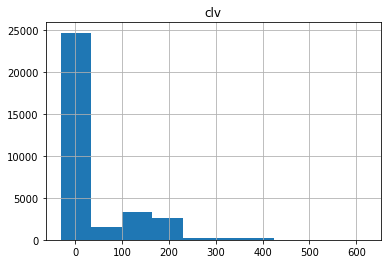

In [449]:
import numpy as np
import matplotlib.pyplot as plt
forclv_final.hist(column='clv')